In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("bostoncelticsdata.csv")

In [ ]:
print("Column names:", df.columns.tolist())

Column names: ['Season', 'Lg', 'Team', 'W', 'L', 'W/L%', 'Finish', 'SRS', 'Win%', 'Pace', 'Rel Pace', 'ORtg', 'Rel ORtg', 'DRtg', 'Rel DRtg', 'GM', 'Playoffs', 'Coaches', 'Top WS', 'PointDifferential']


In [ ]:
df.columns = df.columns.str.strip()


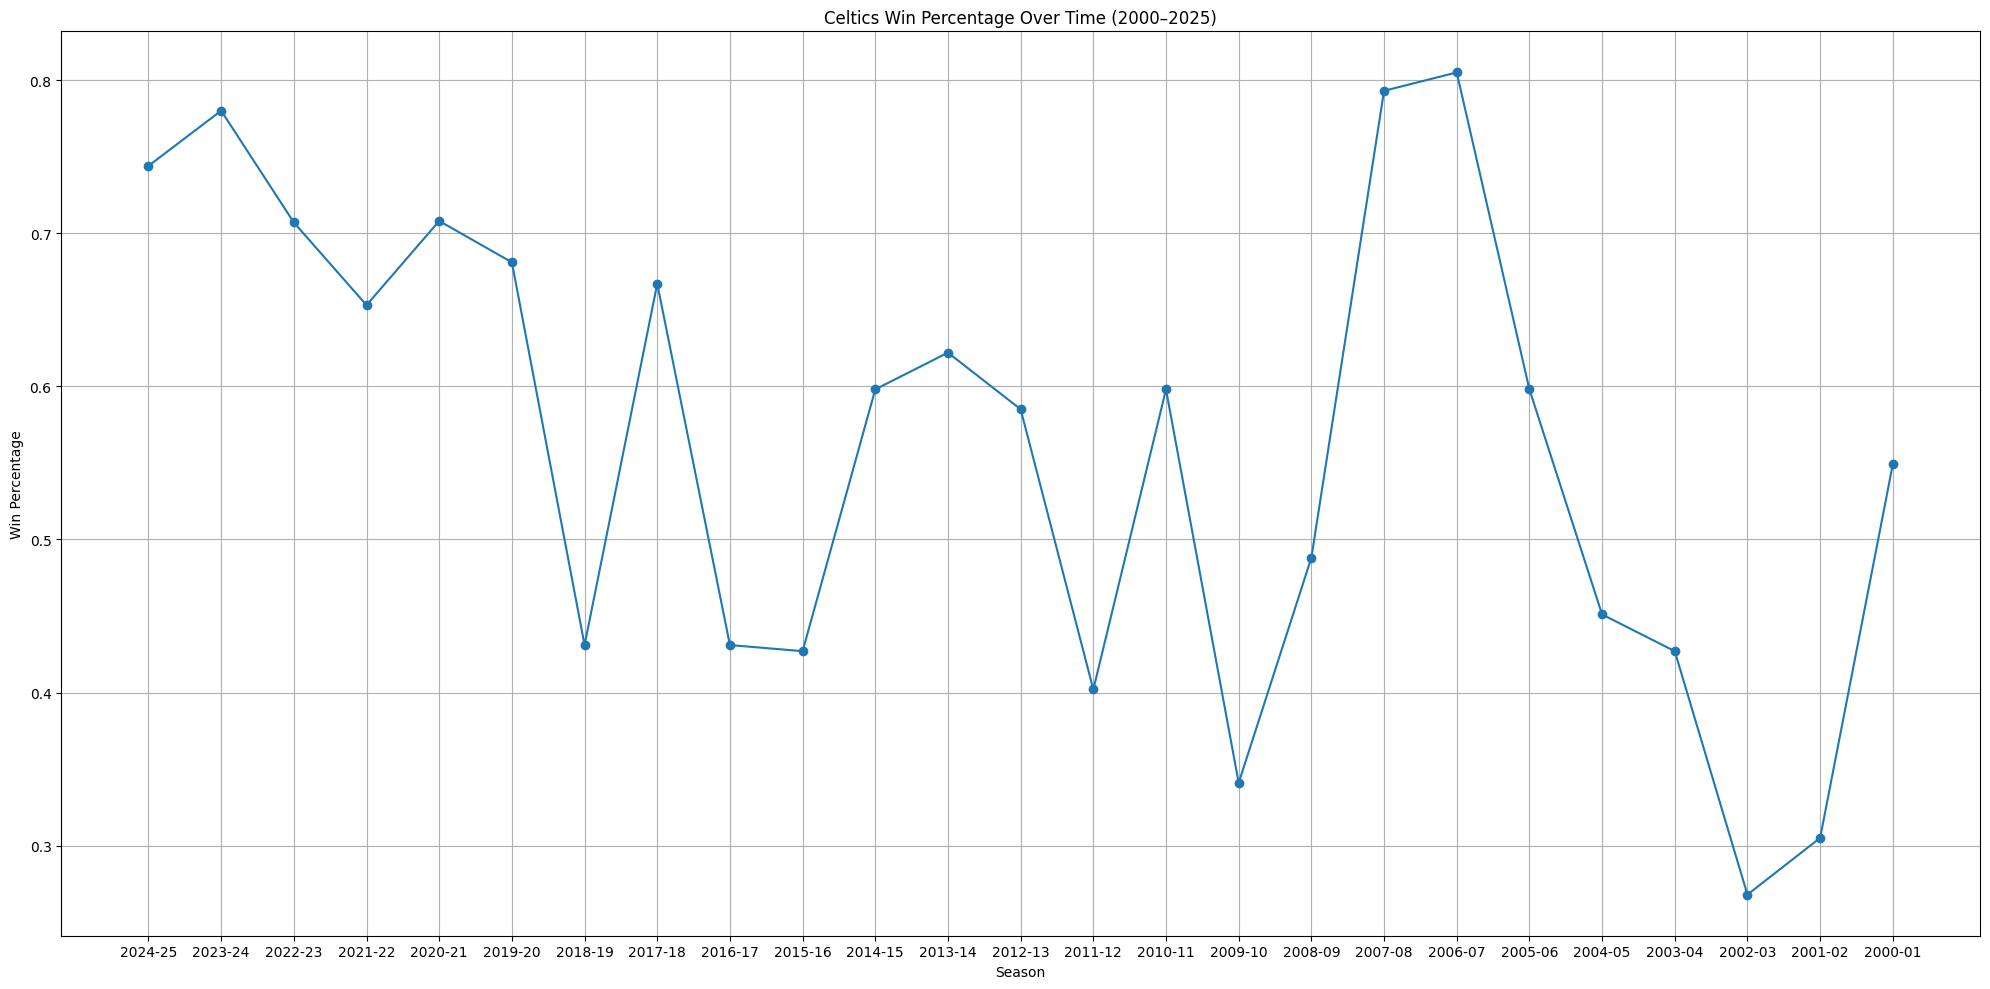

In [ ]:
#Question 1: How has the Boston Celtics’ win percentage changed over time since 2000?
if 'Win%' in df.columns:
    plt.figure(figsize=(20, 10))
    plt.plot(df['Season'], df['Win%'], marker='o')
    plt.title('Celtics Win Percentage Over Time (2000–2025)')
    plt.xlabel('Season')
    plt.ylabel('Win Percentage')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Win%' not found.")


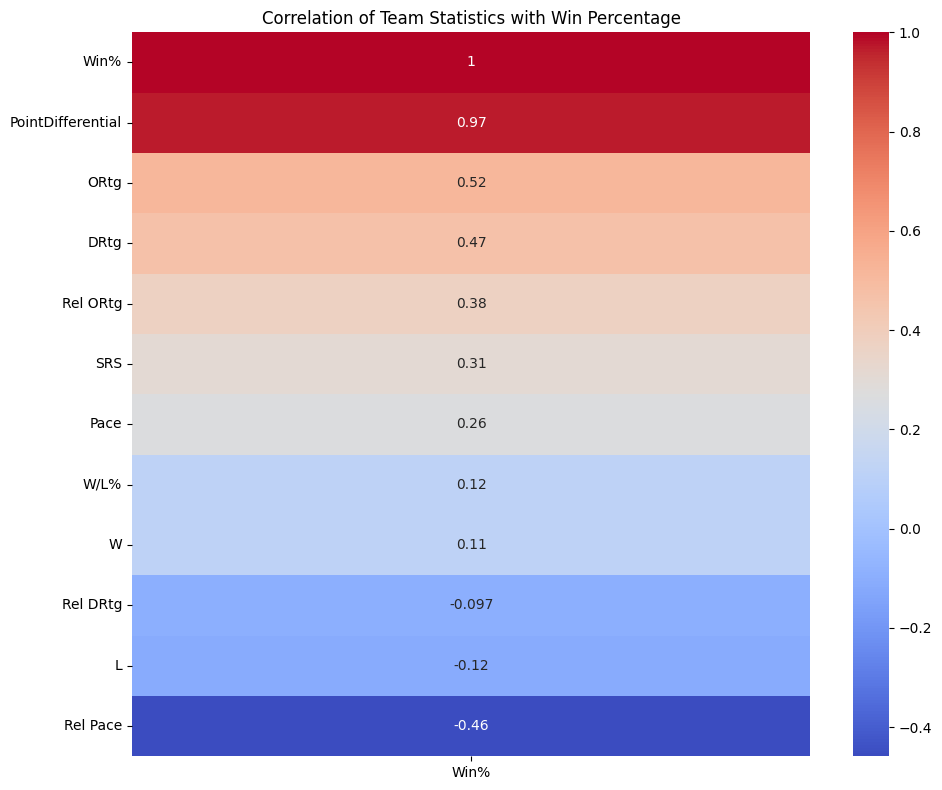

In [ ]:
#Question 2: What team statistics are most correlated with a successful season?
numeric_df = df.select_dtypes(include=[np.number])
if 'Win%' in numeric_df.columns:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr()[['Win%']].sort_values(by='Win%', ascending=False), annot=True, cmap='coolwarm')
    plt.title('Correlation of Team Statistics with Win Percentage')
    plt.tight_layout()
    plt.show()
else:
    print("Numeric column 'Win%' not found for correlation heatmap.")


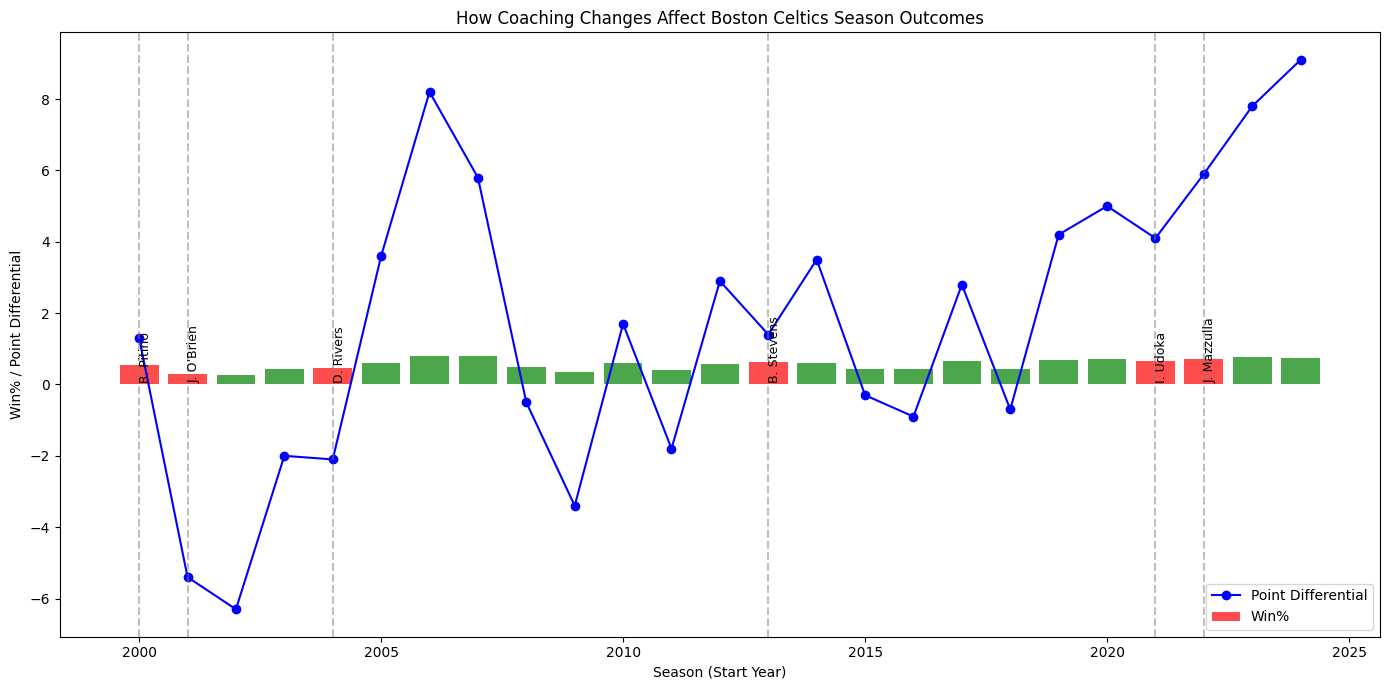

In [ ]:
#Question 3: How do coaching changes affect season outcomes?
df = df.sort_values("Season")

# Extract just the coach name from entries like "J. Mazzulla (61-21)"
df["CoachName"] = df["Coaches"].str.extract(r'^(.*?)\s\(')

# Flag coaching changes
df["CoachChange"] = df["CoachName"] != df["CoachName"].shift(1)

# Set bar colors: red = new coach, green = same coach
colors = ['red' if change else 'green' for change in df["CoachChange"]]

# Plot
plt.figure(figsize=(14, 7))

# Bar for Win%
plt.bar(df["Season"], df["Win%"], color=colors, alpha=0.7, label='Win%')

# Line for Point Differential
plt.plot(df["Season"], df["PointDifferential"], color='blue', marker='o', label='Point Differential')

# Vertical lines for coaching changes
for idx, row in df[df["CoachChange"]].iterrows():
    plt.axvline(x=row["Season"], color='gray', linestyle='--', alpha=0.5)
    plt.text(row["Season"], 0.05, f"{row['CoachName']}", rotation=90, verticalalignment='bottom', fontsize=9)

plt.title("How Coaching Changes Affect Boston Celtics Season Outcomes")
plt.xlabel("Season (Start Year)")
plt.ylabel("Win% / Point Differential")
plt.legend()
plt.tight_layout()
plt.show()

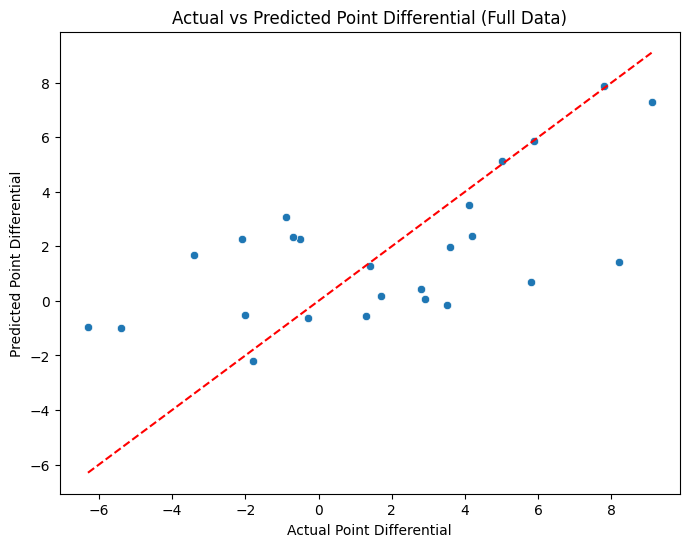

In [ ]:
#Question 4: Can we predict Celtics’ point differential (average points scored minus points allowed per game) based on team statistics such as offensive rating, defensive rating, and pace?
df = df.dropna(subset=['PointDifferential', 'ORtg', 'DRtg', 'Pace'])

# Features and target
X = df[['ORtg', 'DRtg', 'Pace']]
y = df['PointDifferential']

# Fit model to all data
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Actual Point Differential")
plt.ylabel("Predicted Point Differential")
plt.title("Actual vs Predicted Point Differential (Full Data)")
plt.show()